In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# reading csv file
df = pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv')     

In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
#checking the data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [6]:
#checking nan values
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [8]:
#droping the nan value
df.dropna(inplace=True)

In [12]:
# checking unique values in year feature
df.year.unique()

array([2012])

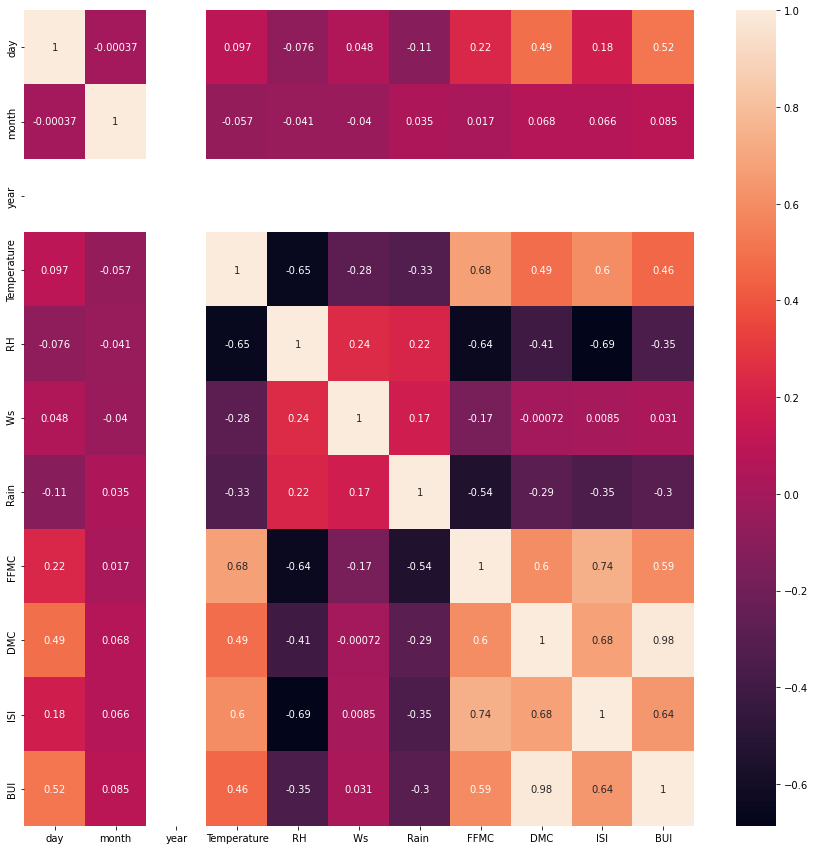

In [11]:
plt.figure(figsize=(15,15))                       # changing fig size 
sns.heatmap(df.corr(),annot=True)                  # plotting correlation
plt.show()

In [14]:
df.drop(['DMC','year'],inplace=True,axis=1)  # dropping the year and DMC 

In [15]:
# splitting the dependent and independent features
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
x

,day,month,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,6.9,0.0,1.7,0
4,5,6,27,77,16,0.0,64.8,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,44.5,4.5,16.9,6.5
240,27,9,28,87,15,4.4,41.1,8,0.1,6.2,0
241,28,9,27,87,29,0.5,45.9,7.9,0.4,3.4,0.2
242,29,9,24,54,18,0.1,79.7,15.2,1.7,5.1,0.7


In [17]:
y

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
239         fire   
240     not fire   
241     not fire   
242     not fire   
243    not fire    
Name: Classes  , Length: 243, dtype: object

In [20]:
# changing the object into a binary format 
Y = y.apply(lambda x : 0 if x.startswith('not') else 1)
Y

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes  , Length: 243, dtype: int64

In [22]:
# checking the info
x.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3    RH          243 non-null    int64  
 4    Ws          243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DC           243 non-null    object 
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    object 
dtypes: float64(4), int64(5), object(2)
memory usage: 32.8+ KB


In [23]:
# changing datatype 
x.DC = x.DC.astype(float)

In [24]:
x.FWI = x.FWI.astype(float)

In [25]:
x.info() #checking info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3    RH          243 non-null    int64  
 4    Ws          243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 32.8 KB


In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [27]:
#scaling the independent feature from 1 to 0  
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(x) 

In [28]:
X

array([[0.        , 0.        , 0.35      , ..., 0.06842105, 0.03437967,
        0.01607717],
       [0.03333333, 0.        , 0.35      , ..., 0.05263158, 0.04185351,
        0.01286174],
       [0.06666667, 0.        , 0.2       , ..., 0.01578947, 0.02391629,
        0.00321543],
       ...,
       [0.9       , 1.        , 0.25      , ..., 0.02105263, 0.03437967,
        0.00643087],
       [0.93333333, 1.        , 0.1       , ..., 0.08947368, 0.05979073,
        0.02250804],
       [0.96666667, 1.        , 0.1       , ..., 0.06315789, 0.05530643,
        0.01607717]])

In [31]:
# cross validation
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size = 0.1,shuffle=True)


In [32]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((218, 11), (218,), (25, 11), (25,))

# Logistic Regression

In [33]:
LR_model = LogisticRegression()
model = LR_model.fit(x_train,y_train)
LR_pred =  model.predict(x_test)

In [35]:
from sklearn.metrics import classification_report


In [36]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.96        14

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



In [38]:
#saving model
filename = 'logistic_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [51]:
#saving minmax scaler
pickle.dump(scaler, open("scaler.pkl", 'wb'))

# SVM

In [48]:
SVM_model = SVC().fit(x_train,y_train)
SVM_pred = SVM_model.predict(x_test)


In [49]:
print(classification_report(y_test,SVM_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.96        14

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



In [50]:
# saving a model
pickle.dump(SVM_model,open('SVM_model.pkl','wb'))

# Neural Networks

In [67]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam

## Adding layers and dropout 


In [64]:
nn_model = Sequential()
nn_model.add(Dense(32,activation='relu',input_shape=x_train.shape[1:], name='hidden_1'))
nn_model.add(Dense(64,activation='relu', name="hidden_2"))
nn_model.add(Dense(128,activation='relu', name="hidden_3"))
nn_model.add(Dropout(0.3,name='Dropout_1'))
nn_model.add(Dense(64,activation='relu', name="hidden_4"))
nn_model.add(Dropout(0.3,name='Dropout_2'))
nn_model.add(Dense(32,activation='relu', name="hidden_5"))
nn_model.add(Dense(1,activation='sigmoid', name='output'))
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 32)                384       
_________________________________________________________________
hidden_2 (Dense)             (None, 64)                2112      
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               8320      
_________________________________________________________________
Dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_4 (Dense)             (None, 64)                8256      
_________________________________________________________________
Dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
hidden_5 (Dense)             (None, 32)               

### Training 


In [68]:
nn_model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [69]:
nn_model.fit(x_train,y_train,epochs=40)

Epoch 1/40
7/7 [==============================] - 1s 3ms/step - loss: 0.6559 - accuracy: 0.5917 - precision_2: 0.5810 - recall_2: 0.9919
Epoch 2/40
7/7 [==============================] - 0s 4ms/step - loss: 0.6198 - accuracy: 0.6055 - precision_2: 0.5894 - recall_2: 0.9919
Epoch 3/40
7/7 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.6789 - precision_2: 0.6373 - recall_2: 1.0000
Epoch 4/40
7/7 [==============================] - 0s 4ms/step - loss: 0.4944 - accuracy: 0.7569 - precision_2: 0.7035 - recall_2: 0.9837
Epoch 5/40
7/7 [==============================] - 0s 4ms/step - loss: 0.4023 - accuracy: 0.8853 - precision_2: 0.8828 - recall_2: 0.9187
Epoch 6/40
7/7 [==============================] - 0s 4ms/step - loss: 0.3324 - accuracy: 0.8532 - precision_2: 0.8227 - recall_2: 0.9431
Epoch 7/40
7/7 [==============================] - 0s 4ms/step - loss: 0.2588 - accuracy: 0.9174 - precision_2: 0.9268 - recall_2: 0.9268
Epoch 8/40
7/7 [=========================

In [70]:
# saving a model 
nn_model.save('nn_model.hdf5')

# inference

In [37]:
import pickle

In [43]:
x

,day,month,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,44.5,4.5,16.9,6.5
240,27,9,28,87,15,4.4,41.1,8.0,0.1,6.2,0.0
241,28,9,27,87,29,0.5,45.9,7.9,0.4,3.4,0.2
242,29,9,24,54,18,0.1,79.7,15.2,1.7,5.1,0.7


In [45]:
loaded_scaler = pickle.load(open("scaler.pkl", 'rb'))  #loading minmaxscaler
test_x = loaded_scaler.transform(x)

In [47]:
test_x

array([[0.        , 0.        , 0.35      , ..., 0.06842105, 0.03437967,
        0.01607717],
       [0.03333333, 0.        , 0.35      , ..., 0.05263158, 0.04185351,
        0.01286174],
       [0.06666667, 0.        , 0.2       , ..., 0.01578947, 0.02391629,
        0.00321543],
       ...,
       [0.9       , 1.        , 0.25      , ..., 0.02105263, 0.03437967,
        0.00643087],
       [0.93333333, 1.        , 0.1       , ..., 0.08947368, 0.05979073,
        0.02250804],
       [0.96666667, 1.        , 0.1       , ..., 0.06315789, 0.05530643,
        0.01607717]])

In [39]:
loaded_model = pickle.load(open(filename, 'rb'))

In [40]:
loaded_model.predict(x_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0])

In [75]:
from tensorflow.keras.models import load_model

In [76]:
nn_model = load_model('/content/nn_model.hdf5')       #loading nn model 

In [77]:
np.round(nn_model.predict(x_test))

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)